## Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

In [366]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [367]:
df = pd.read_csv("bank_marketing_part1_Data-1.csv")
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [368]:
df.shape

(210, 7)

### Checking for the null values

In [369]:
df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

There are no missing values in the dataset.

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [371]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [372]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='spending'>

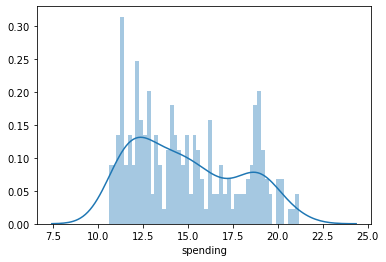

In [373]:
plt.figure(figsize=(6,4))
sns.distplot(df['spending'], bins= 50)

<AxesSubplot:xlabel='spending'>

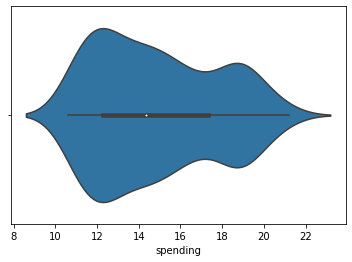

In [374]:
sns.violinplot(df['spending'])

<AxesSubplot:xlabel='advance_payments'>

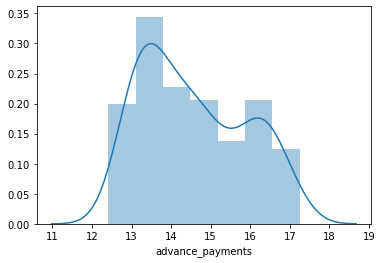

In [375]:
plt.figure(figsize=(6,4))
sns.distplot(df['advance_payments'])

<AxesSubplot:xlabel='probability_of_full_payment'>

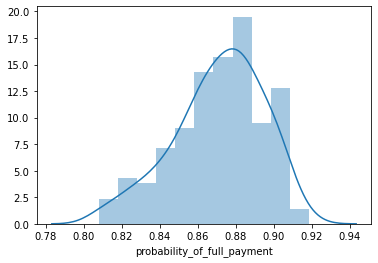

In [376]:
plt.figure(figsize=(6,4))
sns.distplot(df['probability_of_full_payment'])

<AxesSubplot:xlabel='current_balance'>

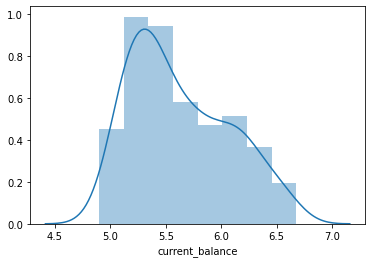

In [377]:
plt.figure(figsize=(6,4))
sns.distplot(df['current_balance'])

array([[<AxesSubplot:title={'center':'advance_payments'}>,
        <AxesSubplot:title={'center':'credit_limit'}>,
        <AxesSubplot:title={'center':'current_balance'}>],
       [<AxesSubplot:title={'center':'max_spent_in_single_shopping'}>,
        <AxesSubplot:title={'center':'min_payment_amt'}>,
        <AxesSubplot:title={'center':'probability_of_full_payment'}>],
       [<AxesSubplot:title={'center':'spending'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

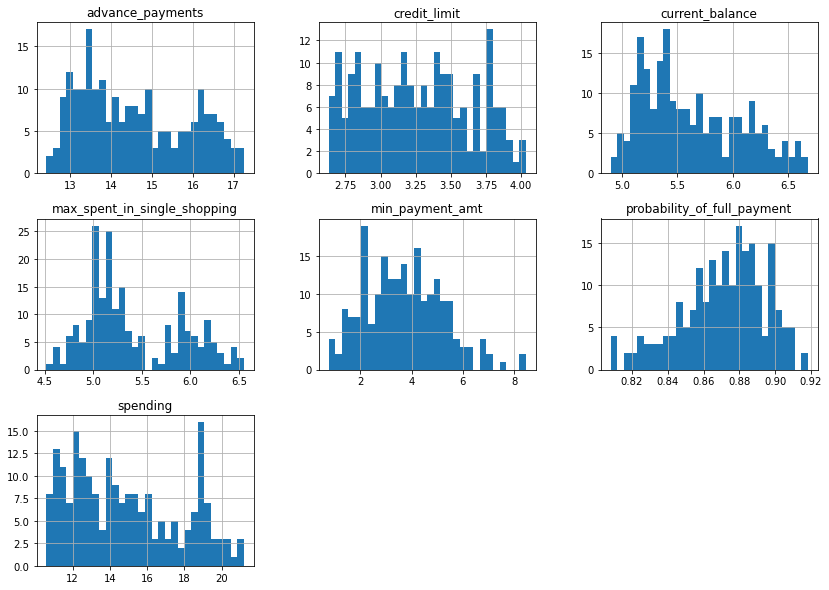

In [378]:
df_col = df.select_dtypes(include= ['int64', 'float64'])
df_col.hist(figsize= (14, 10), bins = 30)

In [379]:
df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [380]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

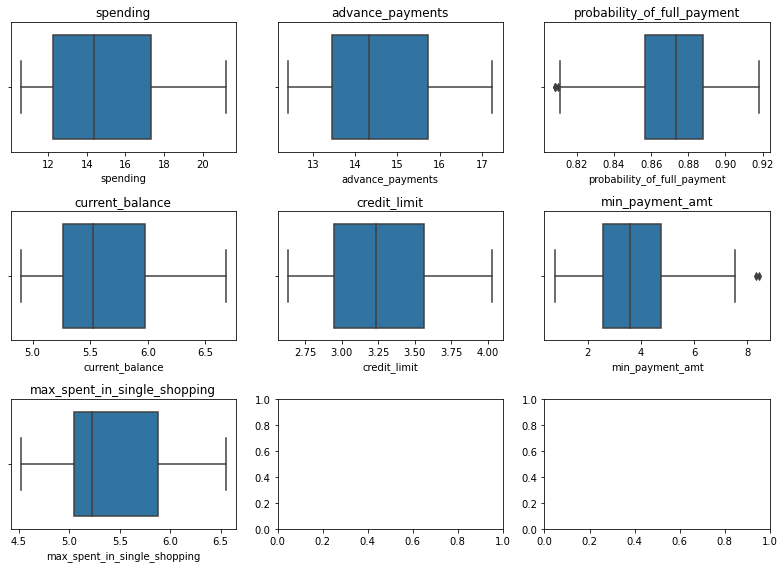

In [381]:
fig,a =  plt.subplots(3,3, figsize=(11, 8))
sns.boxplot(x=df['spending'], ax= a[0][0]).set_title('spending')
sns.boxplot(x=df['advance_payments'], ax= a[0][1]).set_title('advance_payments')
sns.boxplot(x=df['probability_of_full_payment'], ax= a[0][2]).set_title('probability_of_full_payment')
sns.boxplot(x=df['current_balance'], ax= a[1][0]).set_title('current_balance')
sns.boxplot(x=df['credit_limit'], ax= a[1][1]).set_title('credit_limit')
sns.boxplot(x=df['min_payment_amt'], ax= a[1][2]).set_title('min_payment_amt')
sns.boxplot(x=df['max_spent_in_single_shopping'], ax= a[2][0]).set_title('max_spent_in_single_shopping')
fig.tight_layout()

In [382]:
#Function to treat outliers using IQR method
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [383]:
#Outlier treatment

lr_pfp,ur_pfp=remove_outlier(df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']>ur_pfp,ur_pfp,df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lr_pfp,lr_pfp,df['probability_of_full_payment'])

lr_mpa,ur_mpa=remove_outlier(df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']>ur_mpa,ur_mpa,df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']<lr_mpa,lr_mpa,df['min_payment_amt'])

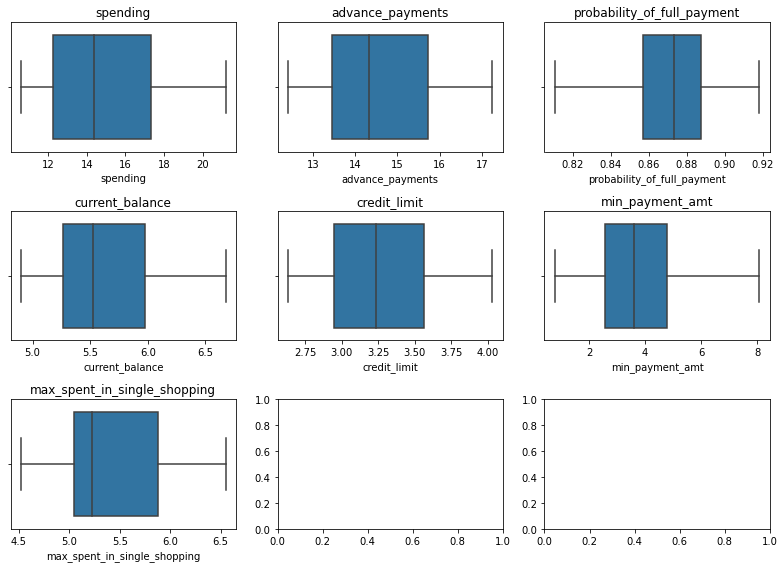

In [384]:
# Checking for outlier afer outlier treatment
fig,a =  plt.subplots(3,3, figsize=(11, 8))
sns.boxplot(x=df['spending'], ax= a[0][0]).set_title('spending')
sns.boxplot(x=df['advance_payments'], ax= a[0][1]).set_title('advance_payments')
sns.boxplot(x=df['probability_of_full_payment'], ax= a[0][2]).set_title('probability_of_full_payment')
sns.boxplot(x=df['current_balance'], ax= a[1][0]).set_title('current_balance')
sns.boxplot(x=df['credit_limit'], ax= a[1][1]).set_title('credit_limit')
sns.boxplot(x=df['min_payment_amt'], ax= a[1][2]).set_title('min_payment_amt')
sns.boxplot(x=df['max_spent_in_single_shopping'], ax= a[2][0]).set_title('max_spent_in_single_shopping')
fig.tight_layout()

### Multivariate Analysis

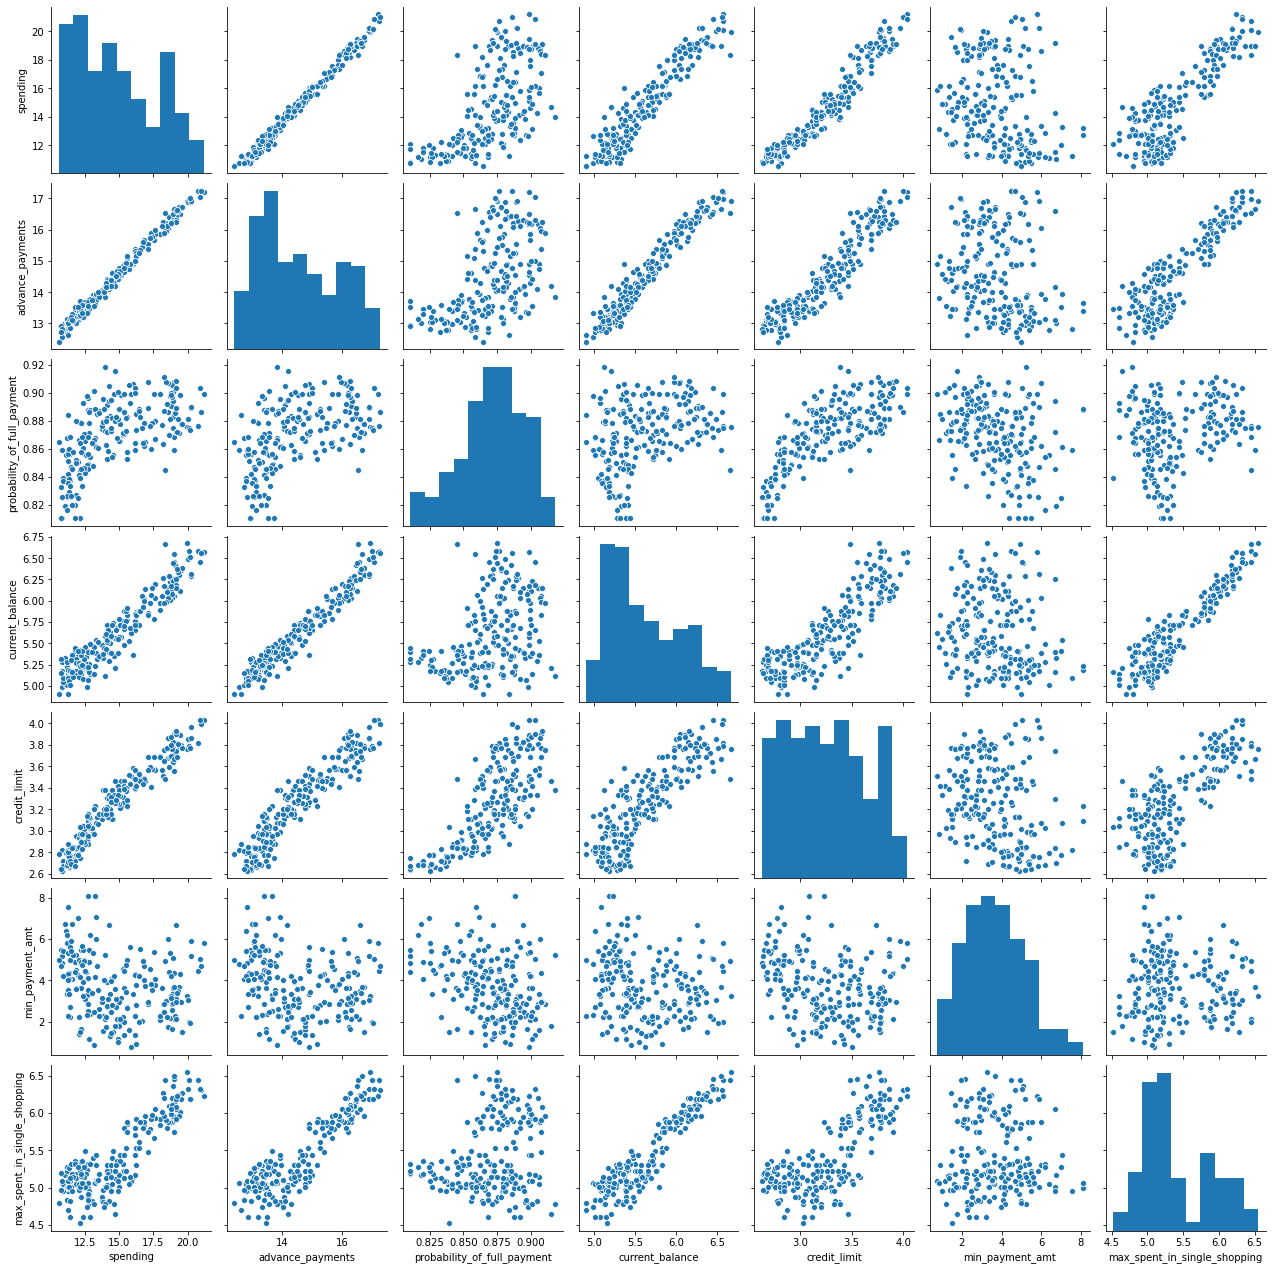

In [385]:
sns.pairplot(df)
plt.show()

In [386]:
correlation_between_variables = df.corr()
correlation_between_variables

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608900,0.949985,0.970771,-0.229619,0.863693
advance_payments,0.994341,1.000000,0.529925,0.972422,0.944829,-0.217051,0.890784
probability_of_full_payment,0.608900,0.529925,1.000000,0.368419,0.762218,-0.335071,0.227140
current_balance,0.949985,0.972422,0.368419,1.000000,0.860415,-0.170701,0.932806
credit_limit,0.970771,0.944829,0.762218,0.860415,1.000000,-0.258980,0.749131
min_payment_amt,-0.229619,-0.217051,-0.335071,-0.170701,-0.258980,1.000000,-0.009605
max_spent_in_single_shopping,0.863693,0.890784,0.227140,0.932806,0.749131,-0.009605,1.000000


<AxesSubplot:>

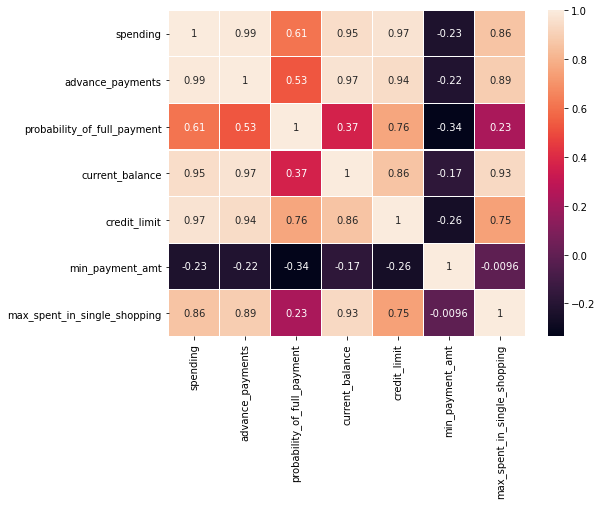

In [387]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(correlation_between_variables, annot = True, linewidth = .2, ax=ax)

### Scaling

In [388]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_DF = X.fit_transform(df)
scaled_DF

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [389]:
scaled_df = pd.DataFrame(scaled_DF, columns=df.columns)

In [390]:
scaled_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


### Applying Hierarchical Clustering to this scaled data

In [391]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [392]:
H_Clust = linkage(scaled_df, method = 'ward')

In [393]:
H_Clust

array([[1.90000000e+01, 2.30000000e+01, 1.93561325e-01, 2.00000000e+00],
       [3.00000000e+00, 4.40000000e+01, 2.10880708e-01, 2.00000000e+00],
       [7.00000000e+00, 3.00000000e+01, 2.11416263e-01, 2.00000000e+00],
       [9.50000000e+01, 1.26000000e+02, 2.19575820e-01, 2.00000000e+00],
       [7.00000000e+01, 1.16000000e+02, 2.41240086e-01, 2.00000000e+00],
       [1.48000000e+02, 2.07000000e+02, 2.59139938e-01, 2.00000000e+00],
       [1.27000000e+02, 1.57000000e+02, 2.71769302e-01, 2.00000000e+00],
       [7.60000000e+01, 1.31000000e+02, 2.87275484e-01, 2.00000000e+00],
       [6.70000000e+01, 1.72000000e+02, 2.91364436e-01, 2.00000000e+00],
       [4.00000000e+00, 2.20000000e+01, 2.91569402e-01, 2.00000000e+00],
       [7.10000000e+01, 1.51000000e+02, 2.97134664e-01, 2.00000000e+00],
       [1.85000000e+02, 2.06000000e+02, 3.19058136e-01, 2.00000000e+00],
       [9.90000000e+01, 1.59000000e+02, 3.34862969e-01, 2.00000000e+00],
       [9.00000000e+00, 1.37000000e+02, 3.37994916e

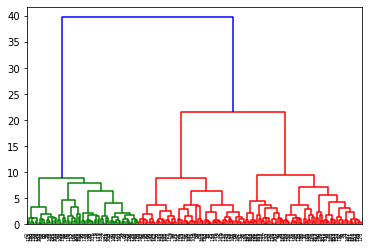

In [394]:
dend = dendrogram(H_Clust)

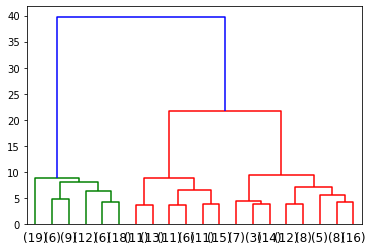

In [395]:
dend = dendrogram(H_Clust,
                 truncate_mode='lastp',
                 p = 20,
                 )

In [396]:
from scipy.cluster.hierarchy import fcluster

In [397]:
clusters_1 = fcluster(H_Clust, 2, criterion='maxclust')
clusters_1

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [398]:
clusters_2 = fcluster(H_Clust, 25, criterion='distance')
clusters_2

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [399]:
np.array_equal(clusters_1,clusters_2)

True

In [400]:
df['H_clusters'] = clusters_1

In [401]:
df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252000,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336000,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368000,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182000,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068000,5.837,1
5,12.70,13.41,0.887400,5.183,3.091,8.079625,5.000,2
6,12.02,13.33,0.850300,5.350,2.810,4.271000,5.308,2
7,13.74,14.05,0.874400,5.482,3.114,2.932000,4.825,2
8,18.17,16.26,0.863700,6.271,3.512,2.853000,6.273,1
9,11.23,12.88,0.851100,5.140,2.795,4.325000,5.003,2


In [402]:
df.sort_values(by= 'H_clusters', ascending = False).head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879,2
176,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,2
100,13.37,13.78,0.8849,5.320,3.128,4.670,5.091,2
102,15.38,14.66,0.8990,5.477,3.465,3.600,5.439,2
172,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,2
104,15.69,14.75,0.9058,5.527,3.514,1.599,5.046,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
171,11.49,13.22,0.8263,5.304,2.695,5.388,5.310,2
107,13.32,13.94,0.8613,5.541,3.073,7.035,5.440,2
108,12.80,13.47,0.8860,5.160,3.126,4.873,4.914,2


In [403]:
df.sort_values(by= 'H_clusters', ascending = True).head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
159,17.36,15.76,0.8785,6.145,3.574,3.526,5.971,1
73,20.20,16.89,0.8894,6.285,3.864,5.173,6.187,1
72,20.10,16.99,0.8746,6.581,3.785,1.955,6.449,1
160,20.88,17.05,0.9031,6.450,4.032,5.016,6.321,1
162,18.88,16.26,0.8969,6.084,3.764,1.649,6.109,1
68,19.15,16.45,0.8890,6.245,3.815,3.084,6.185,1
163,17.26,15.73,0.8763,5.978,3.594,4.539,5.791,1
66,20.71,17.23,0.8763,6.579,3.814,4.451,6.451,1
65,18.85,16.17,0.9056,6.152,3.806,2.843,6.200,1


In [325]:
df.to_csv('H_Cluster.csv')

## K-Means Clustering

In [404]:
from sklearn.cluster import KMeans

In [405]:
# Again reading the data to perform K menas clustering
df1 = pd.read_csv("bank_marketing_part1_Data-1.csv")
df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


We have already analyzed and performed EDA on this data

In [406]:
# Scaling this data
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_DF2 = X.fit_transform(df1)
scaled_DF2

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [407]:
scaled_df_kmeans = pd.DataFrame(scaled_DF2, columns=df1.columns)
scaled_df_kmeans

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


#### To perform k-means clustering, we need to identify the value of k first.

In [408]:
# Lets k = 2
k_means2 = KMeans(n_clusters = 2,random_state=1)
k_means2.fit(scaled_df_kmeans)
k_means2.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [409]:
k_means2.inertia_

659.1717544870407

In [410]:
# Lets k = 3
k_means3 = KMeans(n_clusters = 3,random_state=1)
k_means3.fit(scaled_df_kmeans)
k_means3.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [411]:
k_means3.inertia_

430.65897315130053

In [412]:
# Lets k = 4
k_means4 = KMeans(n_clusters = 4,random_state=1)
k_means4.fit(scaled_df_kmeans)
k_means4.labels_

array([3, 1, 3, 0, 3, 0, 0, 1, 3, 0, 3, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0,
       3, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 1, 2, 3,
       0, 0, 1, 3, 3, 3, 0, 3, 3, 3, 3, 2, 0, 0, 0, 3, 1, 0, 0, 2, 1, 3,
       3, 1, 3, 1, 1, 0, 3, 3, 0, 3, 1, 0, 2, 1, 1, 1, 1, 3, 0, 2, 2, 2,
       2, 0, 1, 3, 1, 0, 1, 3, 3, 2, 0, 2, 1, 3, 2, 3, 1, 3, 3, 0, 1, 3,
       2, 1, 3, 0, 0, 2, 1, 1, 0, 3, 1, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 1,
       1, 3, 0, 3, 3, 0, 2, 1, 2, 1, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 2,
       0, 1, 1, 0, 1, 2, 3, 0, 3, 2, 3, 0, 2, 1, 1, 0, 1, 0, 1, 3, 3, 3,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 3, 1, 2, 3, 0,
       3, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2])

In [413]:
k_means4.inertia_

371.38509060801096

### Finding Within Sum of Squares

In [414]:
wss = []

In [415]:
for i in range(1,10):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df_kmeans)
    wss.append(KM.inertia_)

In [416]:
wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.38509060801096,
 327.2127816566136,
 289.315995389595,
 262.98186570162255,
 241.81894656086018,
 223.9125422100272]

### Ploting this WSS

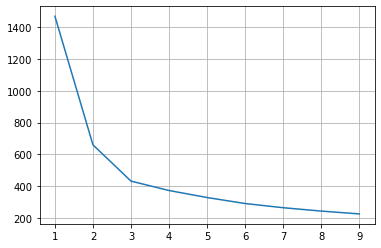

In [417]:
plt.plot(range(1,10), wss)
plt.grid()
plt.show()

### Checking the average silhouette score and silhouette width of the clusters.

In [418]:
from sklearn.metrics import silhouette_samples, silhouette_score

#### Let us check the silhouette score and silhouette width for 2 clusters.


In [419]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df_kmeans)
labels = k_means.labels_
labels

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [420]:
ss={1:0}
for i in range(2, 10):
 k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
 y=k_means.fit_predict(scaled_df_kmeans)
 s =silhouette_score(scaled_df_kmeans, y )
 ss[i]=round(s,5)
 print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,
5)))

The Average Silhouette Score for 2 clusters is 0.46577
The Average Silhouette Score for 3 clusters is 0.40073
The Average Silhouette Score for 4 clusters is 0.32765
The Average Silhouette Score for 5 clusters is 0.28273
The Average Silhouette Score for 6 clusters is 0.2886
The Average Silhouette Score for 7 clusters is 0.28191
The Average Silhouette Score for 8 clusters is 0.26644
The Average Silhouette Score for 9 clusters is 0.25831


In [421]:
silhouette_score(scaled_df_kmeans,labels)

0.46577247686580914

In [422]:
silhouette_samples(scaled_df_kmeans,labels).min()

-0.006171238927461077

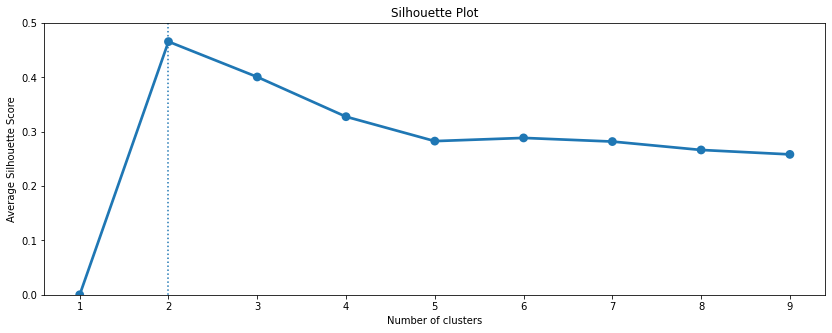

In [423]:
maxkey= [key for key, value in ss.items() if value == max(ss.values())][0]
fig,ax = plt.subplots(figsize=(14,5))
sns.pointplot(list(ss.keys()),list(ss.values()))
plt.vlines(x=maxkey-1,ymax=0,ymin=0.5,linestyles='dotted')
ax.set(ylim=(0, 0.5))
ax.set_title('Silhouette Plot')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Average Silhouette Score')
plt.show()


#### Let us check the silhouette score and silhouette width for 3 clusters.

In [424]:
k_means3 = KMeans(n_clusters = 3,random_state=1)
k_means3.fit(scaled_df_kmeans)
labels_3 = k_means3.labels_
labels_3

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [425]:
silhouette_score(scaled_df_kmeans,labels_3)

0.4007270552751299

In [426]:
silhouette_samples(scaled_df_kmeans,labels_3).min()

0.002713089347678533

In [427]:
s_width = silhouette_samples(scaled_df_kmeans,labels)
s_width

array([ 0.6037974 ,  0.00874752,  0.67803785,  0.49530556,  0.54807214,
        0.33977488,  0.58326925,  0.50325626,  0.58819046,  0.61589061,
        0.59569388,  0.34472282,  0.55860337,  0.58387274,  0.53716394,
        0.52744591,  0.10957153,  0.59242953,  0.55381269,  0.54872885,
        0.6160531 ,  0.47727965,  0.58383032,  0.56200063,  0.10101467,
        0.24988767,  0.48168779,  0.46959909,  0.56916779,  0.47686027,
        0.49562697,  0.61586637,  0.59000755,  0.01460085,  0.55546834,
        0.52173   ,  0.5396383 ,  0.55698092,  0.49870522,  0.6612224 ,
        0.63929387,  0.37565261,  0.51693827,  0.6436123 ,  0.49000343,
        0.59935435,  0.42278448,  0.64386191,  0.57615769,  0.63391341,
        0.57596349,  0.55913045,  0.6343461 ,  0.64292999,  0.67361298,
        0.44222908,  0.57219938,  0.57207891,  0.57322059,  0.61709902,
        0.30276434,  0.60285751,  0.60511045,  0.15250828,  0.29538619,
        0.6352326 ,  0.59897964,  0.38188293,  0.67505952,  0.58

In [428]:
labels

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [431]:
df["Clus_kmeans"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,H_clusters,Clus_kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1


In [432]:
df.Clus_kmeans.value_counts().sort_index()

0    133
1     77
Name: Clus_kmeans, dtype: int64

In [437]:
df=df.drop(['H_clusters'],axis=1)
clust_profile=df.groupby('Clus_kmeans').mean()
clust_profile['freq']=df.Clus_kmeans.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans,,,,,,,,
0,12.930602,13.693459,0.863619,5.339699,3.025917,3.822845,5.081737,133
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,77
